In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import misc

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader, MatReader
import logparser as lp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
#dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"

# Open-sky

In [8]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']

## Plot trajectory

In [9]:
acq_list = ['A8']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))


In [10]:
locations = {}
for device, log in log_dict.items():
    if device in device_android:
        locations[device] = log.loc[log['provider'].isin(['GPS']), ["latitude", "longitude"]]
    else:
        locations[device] = log.loc[log['provider'].isin(['LIGHT']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, scale=18)

TypeError: plotMap() missing 1 required positional argument: 'extent'

## Positioning quality

In [105]:
acq_list = ['A1']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))

# Urban canyoning

In [122]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"

device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']

## Plot trajectory

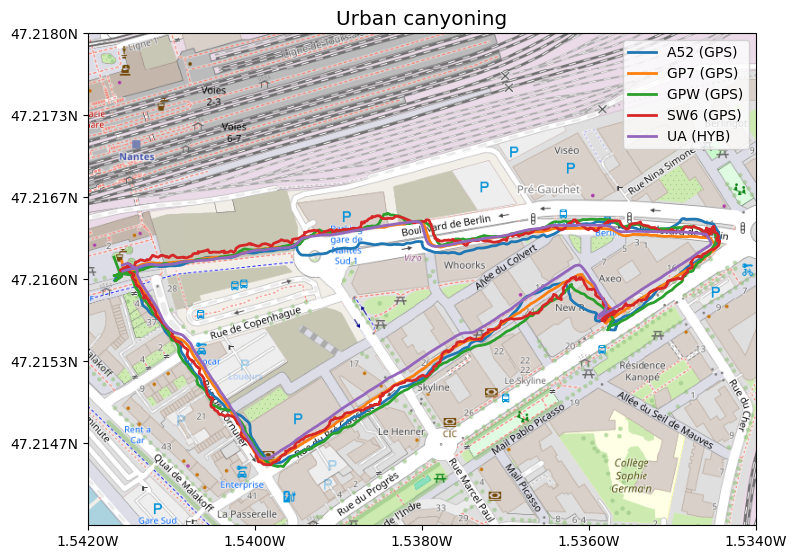

In [112]:
acq_list = ['A1']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
center = [47.216, -1.538]
extent = [center[1] - 0.004, center[1] + 0.004, center[0] - 0.002, center[0] + 0.002]

locations = {}
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['UA (HYB)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['HYB']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(8,5.8))
plt.title("Urban canyoning")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

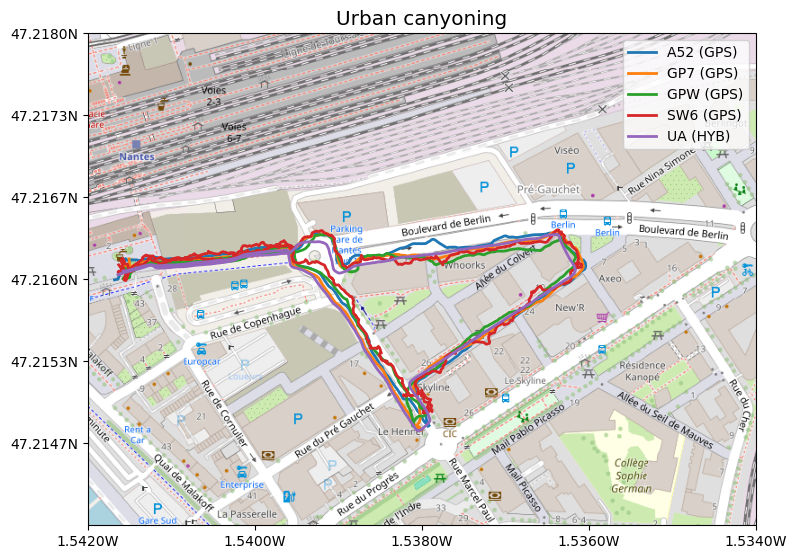

In [123]:
acq_list = ['A2']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
center = [47.216, -1.538]
extent = [center[1] - 0.004, center[1] + 0.004, center[0] - 0.002, center[0] + 0.002]

locations = {}
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['UA (HYB)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['HYB']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(8,5.8))
plt.title("Urban canyoning")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

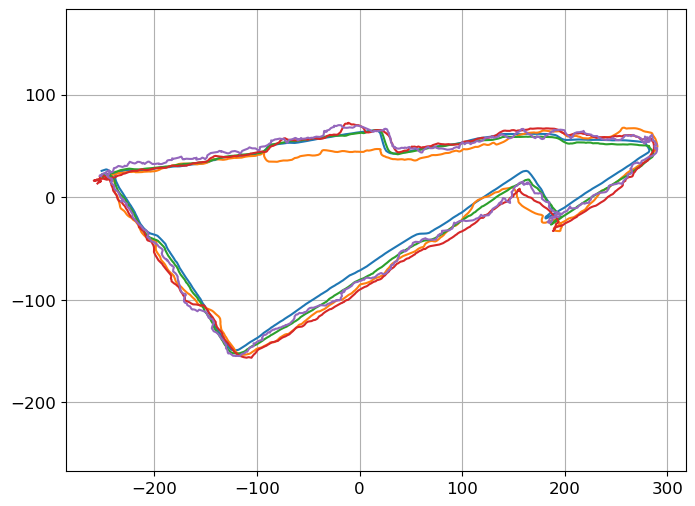

In [ ]:
provider_uliss = 'HYB'
provider_android = 'GPS'
misc.plotEN(log_dict, device_android, device_uliss[0], acq_list[0], provider_uliss, provider_android)

## Positioning quality

In [ ]:
acq_list = ['A1', 'A2']
#mode = ['TEXTING']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))

(0.0, 50.0)

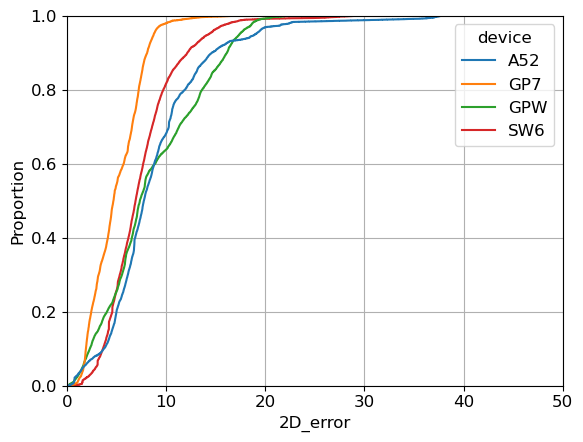

In [ ]:
provider_uliss = 'HYB'
provider_android = 'GPS'

acq_list = ['A1', 'A2']

log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
sns.ecdfplot(log_diff, x='2D_error', stat='proportion', hue='device')
plt.grid()
plt.xlim((0,50))

(0.0, 50.0)

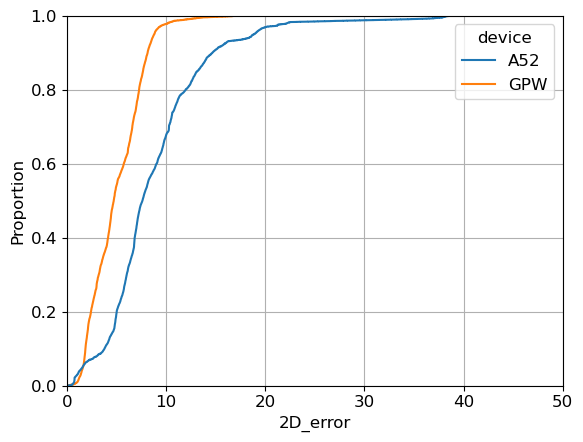

In [ ]:
provider_uliss = 'HYB'
provider_android = 'FUSED'

acq_list = ['A1', 'A2']

log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
sns.ecdfplot(log_diff, x='2D_error', stat='proportion', hue='device')
plt.grid()
plt.xlim((0,50))

# Light indoor

In [124]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"

device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']

## Plot trajectory

In [133]:
acq_list = ['A4']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))

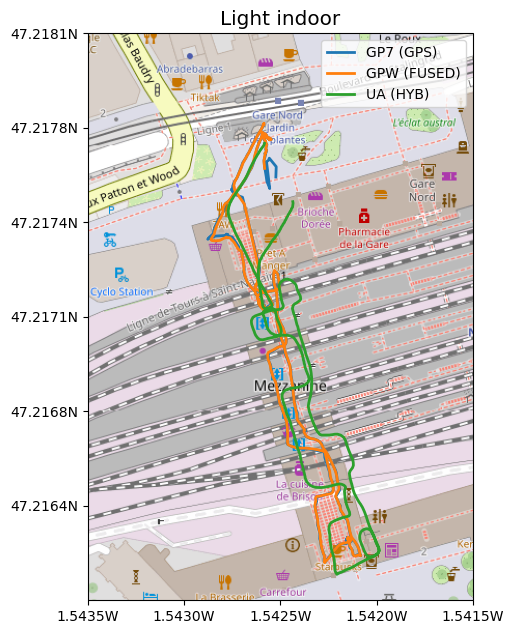

In [134]:
center = [47.2171, -1.5425]
extent = [center[1] - 0.001, center[1] + 0.001, center[0] - 0.001, center[0] + 0.001]

locations = {}
#locations['A52'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
#locations['SW6'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['UA (HYB)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['HYB']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=18, figsize=(5,6.5))
plt.title("Light indoor")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

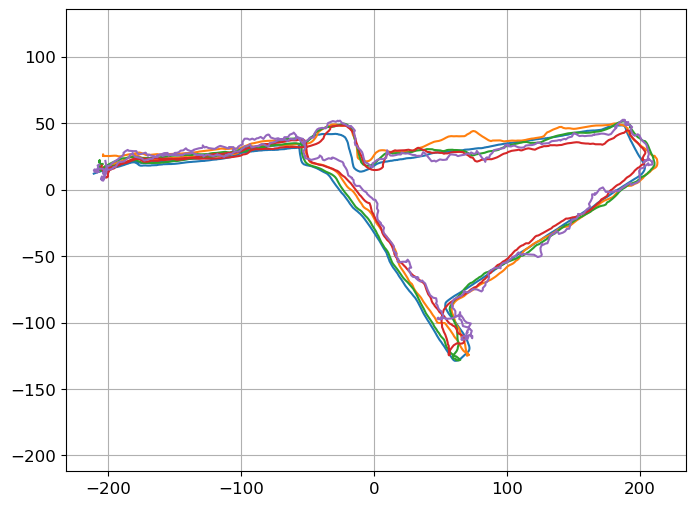

In [116]:
provider_uliss = 'HYB'
provider_android = 'GPS'
misc.plotEN(log_dict, device_android, device_uliss[0], acq_list[0], provider_uliss, provider_android)


## Positioning quality

In [127]:
acq_list = ['A6']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))

(0.0, 50.0)

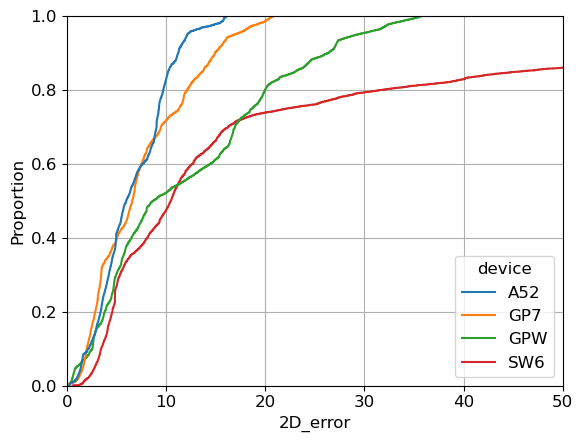

In [128]:
provider_uliss = 'HYB'
provider_android = 'GPS'

log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
sns.ecdfplot(log_diff, x='2D_error', stat='proportion', hue='device')
plt.grid()
plt.xlim((0,50))

(0.0, 50.0)

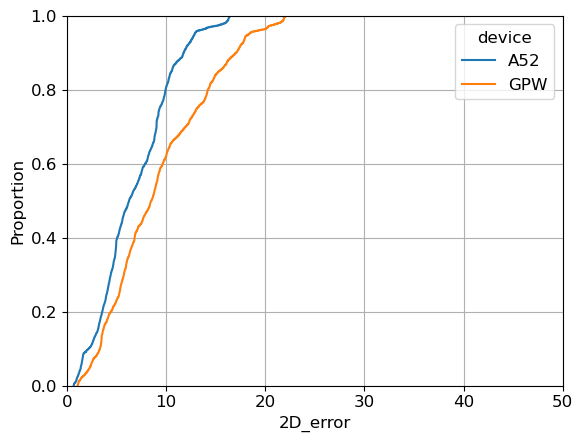

In [ ]:
provider_uliss = 'HYB'
provider_android = 'FUSED'

log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
sns.ecdfplot(log_diff, x='2D_error', stat='proportion', hue='device')
plt.grid()
plt.xlim((0,50))